<a href="https://colab.research.google.com/github/Himanshukunar/excelr-assignments/blob/main/Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000

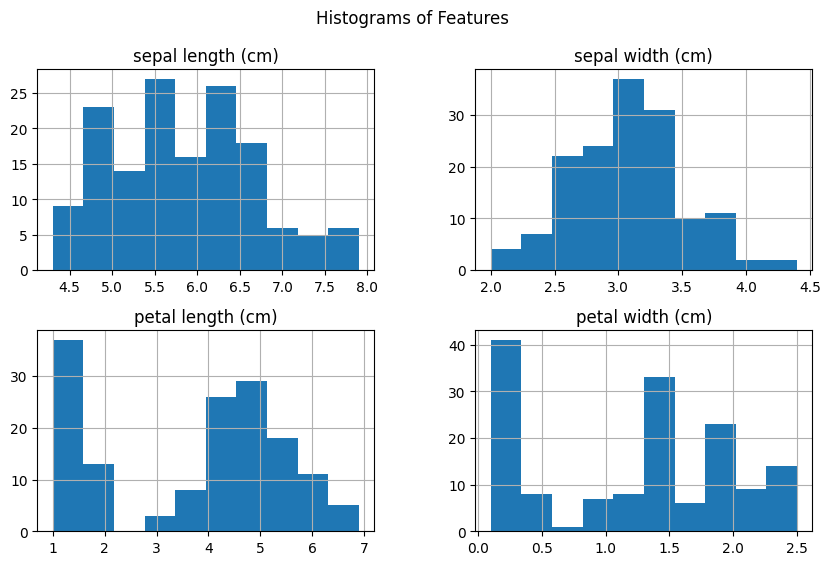

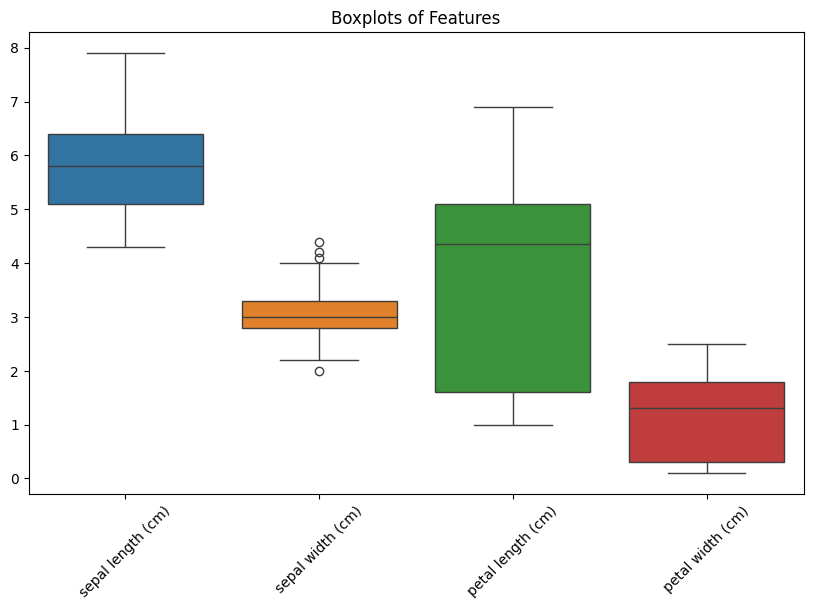

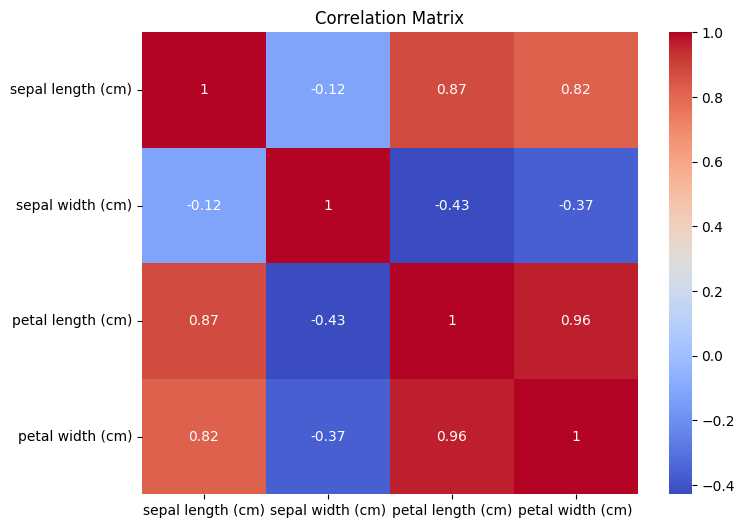

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

print(df.head())
print(df.describe())
print(df.info())

df.hist(figsize=(10, 6))
plt.suptitle("Histograms of Features")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplots of Features")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


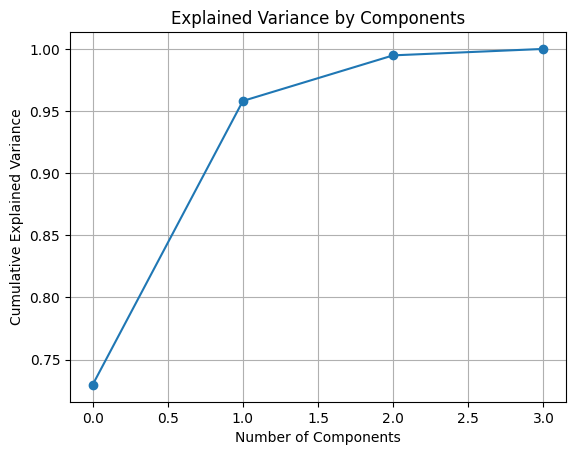

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import numpy as np

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

pca = PCA()
pca_data = pca.fit_transform(scaled_data)

plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.grid()
plt.show()

pca = PCA(n_components=2)
pca_2d = pca.fit_transform(scaled_data)


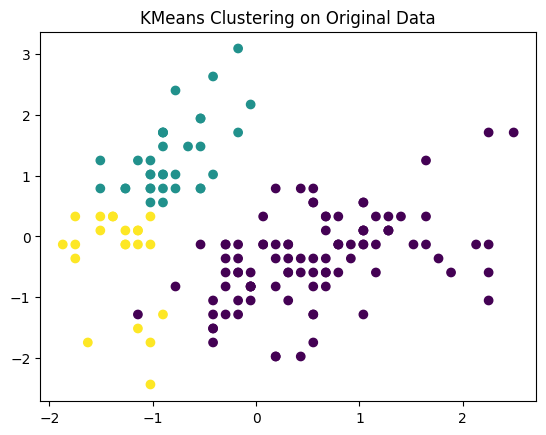

Silhouette Score (original): 0.4798814508199817
Davies-Bouldin Index (original): 0.7893630242997912


In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

kmeans_original = KMeans(n_clusters=3, random_state=42)
labels_original = kmeans_original.fit_predict(scaled_data)
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels_original, cmap='viridis')
plt.title("KMeans Clustering on Original Data")
plt.show()
print("Silhouette Score (original):", silhouette_score(scaled_data, labels_original))
print("Davies-Bouldin Index (original):", davies_bouldin_score(scaled_data, labels_original))


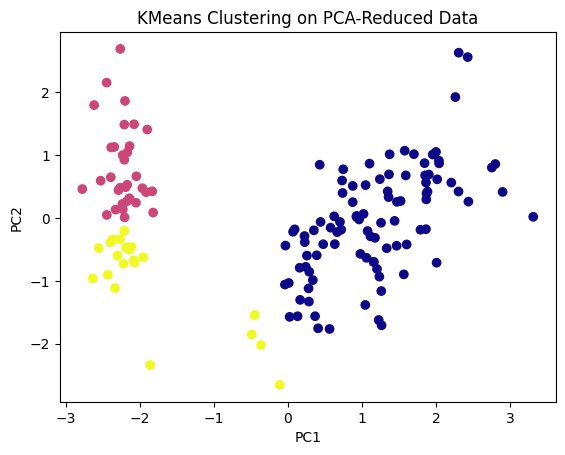

Silhouette Score (PCA): 0.5227910941742375
Davies-Bouldin Index (PCA): 0.7391260626029995


In [4]:

kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(pca_2d)

plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=labels_pca, cmap='plasma')
plt.title("KMeans Clustering on PCA-Reduced Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("Silhouette Score (PCA):", silhouette_score(pca_2d, labels_pca))
print("Davies-Bouldin Index (PCA):", davies_bouldin_score(pca_2d, labels_pca))


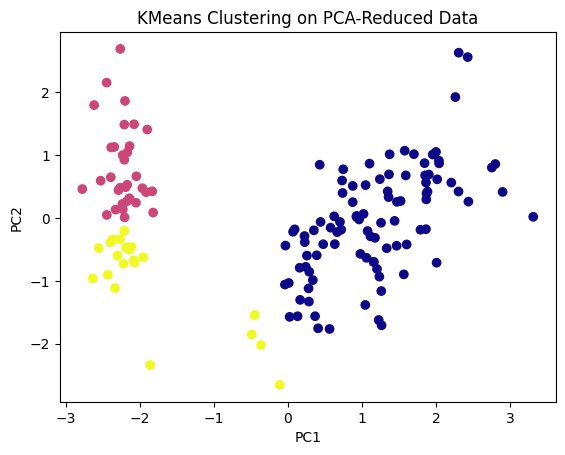

Silhouette Score (PCA): 0.5227910941742375
Davies-Bouldin Index (PCA): 0.7391260626029995


In [5]:

kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(pca_2d)

plt.scatter(pca_2d[:, 0], pca_2d[:, 1], c=labels_pca, cmap='plasma')
plt.title("KMeans Clustering on PCA-Reduced Data")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

print("Silhouette Score (PCA):", silhouette_score(pca_2d, labels_pca))
print("Davies-Bouldin Index (PCA):", davies_bouldin_score(pca_2d, labels_pca))


In [6]:

print(f"Silhouette Score Original: {silhouette_score(scaled_data, labels_original):.3f}")
print(f"Silhouette Score PCA: {silhouette_score(pca_2d, labels_pca):.3f}")
print(f"Davies-Bouldin Index Original: {davies_bouldin_score(scaled_data, labels_original):.3f}")
print(f"Davies-Bouldin Index PCA: {davies_bouldin_score(pca_2d, labels_pca):.3f}")


Silhouette Score Original: 0.480
Silhouette Score PCA: 0.523
Davies-Bouldin Index Original: 0.789
Davies-Bouldin Index PCA: 0.739
